In [6]:
import json
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
with open('../dtypes.json', 'r') as jsonfile:
    dtyp = json.load(jsonfile)

In [8]:
dtyp

{'id': 'float',
 'flag_tsunami': 'str',
 'year': 'float',
 'month': 'float',
 'day': 'float',
 'hour': 'float',
 'minute': 'float',
 'second': 'float',
 'focal_depth': 'float',
 'eq_primary': 'float',
 'eq_mag_mw': 'float',
 'eq_mag_ms': 'float',
 'eq_mag_mb': 'float',
 'intensity': 'float',
 'country': 'str',
 'state': 'str',
 'location_name': 'str',
 'latitude': 'float',
 'longitude': 'float',
 'region_code': 'str',
 'injuries': 'float',
 'injuries_description': 'str',
 'damage_millions_dollars': 'float',
 'damage_description': 'str',
 'total_injuries': 'float',
 'total_injuries_description': 'str',
 'total_damage_millions_dollars': 'float',
 'total_damage_description': 'str'}

In [9]:
data = pd.read_csv('../Datasets/earthquake_data.csv', dtype = dtyp)

In [10]:
mask = data.isnull()
total = mask.sum()
percent = 100 * mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


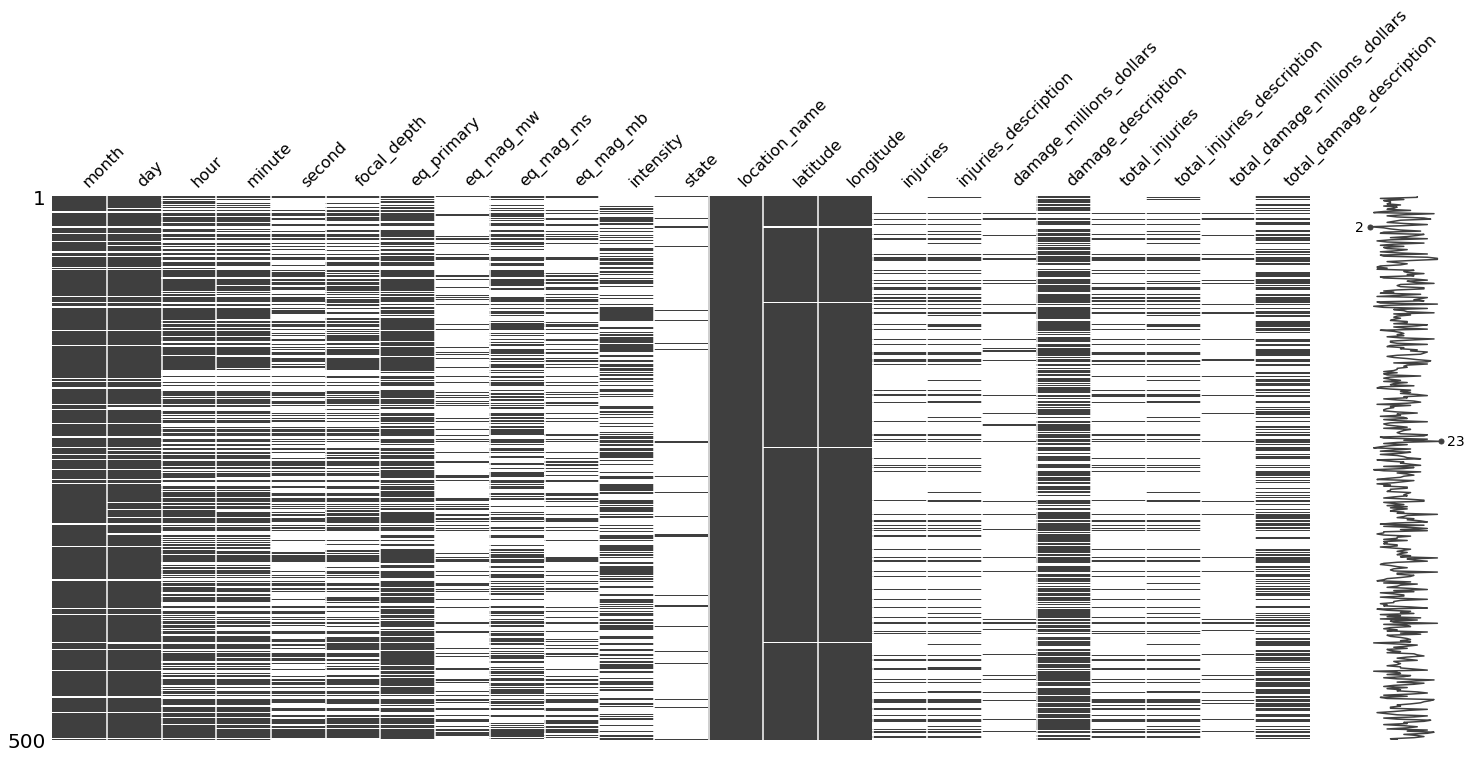

In [11]:
nullable_columns = data.columns[mask.any()].tolist()
msno.matrix(data[nullable_columns].sample(500))
plt.show()

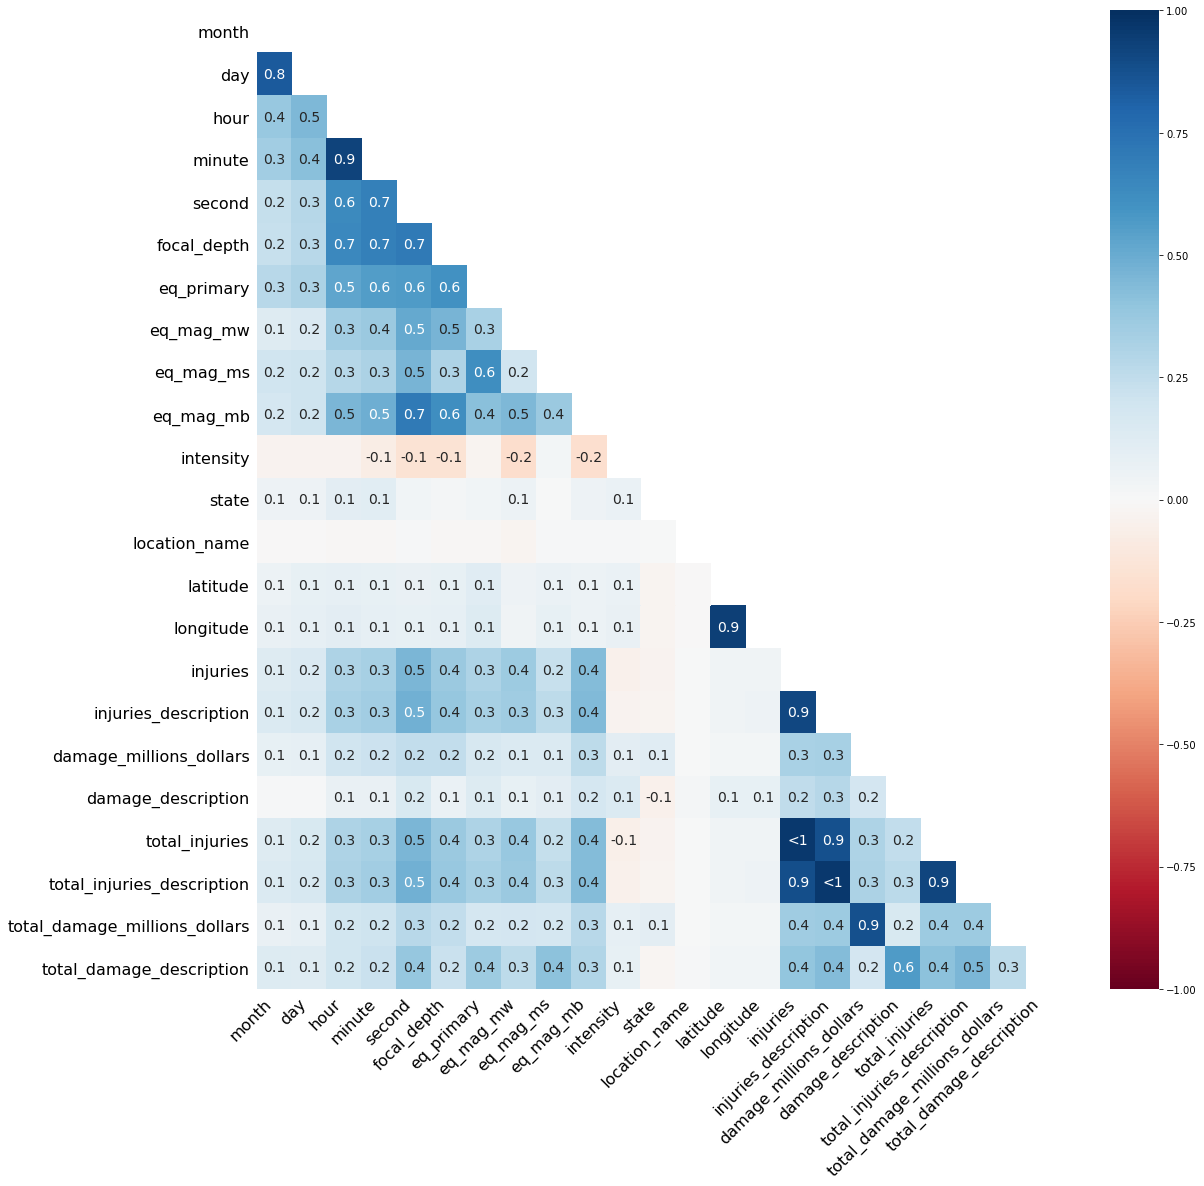

In [12]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()